In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_file = r'C:\Users\AnitaM\Downloads\student-por.csv'
sp = pd.read_csv(data_file)
sp.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:
sp.shape

(649, 33)

In [4]:
# Checking unique values in each of the categorical features:
for col in sp.select_dtypes('object'):
    print(col, ' : ', sp[col].unique())

school  :  ['GP' 'MS']
sex  :  ['F' 'M']
address  :  ['U' 'R']
famsize  :  ['GT3' 'LE3']
Pstatus  :  ['A' 'T']
Mjob  :  ['at_home' 'health' 'other' 'services' 'teacher']
Fjob  :  ['teacher' 'other' 'services' 'health' 'at_home']
reason  :  ['course' 'other' 'home' 'reputation']
guardian  :  ['mother' 'father' 'other']
schoolsup  :  ['yes' 'no']
famsup  :  ['no' 'yes']
paid  :  ['no' 'yes']
activities  :  ['no' 'yes']
nursery  :  ['yes' 'no']
higher  :  ['yes' 'no']
internet  :  ['no' 'yes']
romantic  :  ['no' 'yes']


In [5]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
sp_train, sp_test = train_test_split(sp, test_size=0.2, random_state=2)

In [6]:
sp_train.shape

(519, 33)

In [7]:
sp_test.shape

(130, 33)

In [8]:
# statistics of numeric type data:
sp_train.describe(include=np.number)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,16.739884,2.531792,2.327553,1.562620,1.894027,0.231214,3.953757,3.163776,3.183044,1.499037,2.294798,3.533719,3.745665,11.435453,11.620424,11.974952
std,1.225442,1.136636,1.103098,0.745274,0.825711,0.606042,0.949385,1.060960,1.168779,0.921378,1.288422,1.448711,4.775344,2.757786,2.933702,3.163704
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,18.000000,19.000000


In [9]:
# Convert yes and no to 1s and 0s:

for col in ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    sp_train[col] = np.where(sp_train[col]=='Yes',1,0)
    
    sp_test[col] = np.where(sp_test[col]=='Yes',1,0)

In [10]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian']:
    dummies_train = pd.get_dummies(sp_train[col], drop_first=True, prefix=col)
    sp_train = pd.concat([dummies_train, sp_train], 1)
    del sp_train[col]

    dummies_test = pd.get_dummies(sp_test[col], drop_first=True, prefix=col)
    sp_test = pd.concat([dummies_test, sp_test], 1)
    del sp_test[col]

In [11]:
sp_train.head()

,guardian_mother,guardian_other,reason_home,reason_other,reason_reputation,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,Mjob_health,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
494,1,0,0,0,0,0,1,0,0,0,...,4,4,5,1,3,3,0,8,9,9
377,1,0,0,0,0,0,1,0,0,0,...,4,3,3,2,2,3,0,13,14,13
604,1,0,0,0,0,0,0,1,0,0,...,4,4,2,1,2,2,2,9,10,10
464,0,0,0,1,0,0,1,0,0,0,...,3,4,4,3,4,5,6,11,11,11
123,1,0,0,0,0,0,1,0,0,1,...,3,4,4,1,4,5,4,12,13,13


In [12]:
sp_test.head()

,guardian_mother,guardian_other,reason_home,reason_other,reason_reputation,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,Mjob_health,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
37,1,0,0,0,1,0,0,0,1,0,...,2,4,3,1,1,5,4,13,13,13
440,1,0,1,0,0,0,0,1,0,0,...,5,4,5,4,5,3,0,7,0,0
397,0,0,1,0,0,0,0,0,0,0,...,3,3,1,1,2,4,18,10,12,14
344,1,0,1,0,0,0,0,0,1,0,...,1,4,2,2,2,1,0,18,18,17
248,1,0,1,0,0,0,1,0,0,0,...,3,4,2,1,1,5,2,9,9,9


In [13]:
sp_train.reset_index(drop=True, inplace=True)
sp_test.reset_index(drop=True, inplace=True)

In [14]:
# Fedu and Medu have strong correlation; combining these features to have parent's education(Pedu) level by taking mean:
sp_train['Pedu'] = (sp_train['Fedu'] + sp_train['Medu']) / 2
sp_test['Pedu'] = (sp_test['Fedu'] + sp_test['Medu']) / 2

sp_train.drop(['Fedu', 'Medu'], 1, inplace=True)
sp_test.drop(['Fedu', 'Medu'], 1, inplace=True)

In [15]:
# Dalc and Walc have strong correlation; combining these features to have overall aclohol consumption(Talc) by taking mean:
sp_train['Talc'] = (sp_train['Dalc'] + sp_train['Walc']) / 2
sp_test['Talc'] = (sp_test['Dalc'] + sp_test['Walc']) / 2

sp_train.drop(['Dalc', 'Walc'], 1, inplace=True)
sp_test.drop(['Dalc', 'Walc'], 1, inplace=True)

In [16]:
sp_train.head()

,guardian_mother,guardian_other,reason_home,reason_other,reason_reputation,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,Mjob_health,...,famrel,freetime,goout,health,absences,G1,G2,G3,Pedu,Talc
0,1,0,0,0,0,0,1,0,0,0,...,4,4,5,3,0,8,9,9,1.5,2.0
1,1,0,0,0,0,0,1,0,0,0,...,4,3,3,3,0,13,14,13,4.0,2.0
2,1,0,0,0,0,0,0,1,0,0,...,4,4,2,2,2,9,10,10,1.0,1.5
3,0,0,0,1,0,0,1,0,0,0,...,3,4,4,5,6,11,11,11,1.0,3.5
4,1,0,0,0,0,0,1,0,0,1,...,3,4,4,5,4,12,13,13,4.0,2.5


In [17]:
sp_test.head()

,guardian_mother,guardian_other,reason_home,reason_other,reason_reputation,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,Mjob_health,...,famrel,freetime,goout,health,absences,G1,G2,G3,Pedu,Talc
0,1,0,0,0,1,0,0,0,1,0,...,2,4,3,5,4,13,13,13,4.0,1.0
1,1,0,1,0,0,0,0,1,0,0,...,5,4,5,3,0,7,0,0,1.0,4.5
2,0,0,1,0,0,0,0,0,0,0,...,3,3,1,4,18,10,12,14,2.0,1.5
3,1,0,1,0,0,0,0,0,1,0,...,1,4,2,1,0,18,18,17,4.0,2.0
4,1,0,1,0,0,0,1,0,0,0,...,3,4,2,5,2,9,9,9,1.0,1.0


In [18]:
sp_train.isnull().sum()

guardian_mother      0
guardian_other       0
reason_home          0
reason_other         0
reason_reputation    0
Fjob_health          0
Fjob_other           0
Fjob_services        0
Fjob_teacher         0
Mjob_health          0
Mjob_other           0
Mjob_services        0
Mjob_teacher         0
Pstatus_T            0
famsize_LE3          0
address_U            0
sex_M                0
school_MS            0
age                  0
traveltime           0
studytime            0
failures             0
schoolsup            0
famsup               0
paid                 0
activities           0
nursery              0
higher               0
internet             0
romantic             0
famrel               0
freetime             0
goout                0
health               0
absences             0
G1                   0
G2                   0
G3                   0
Pedu                 0
Talc                 0
dtype: int64

In [19]:
sp_test.isnull().sum()

guardian_mother      0
guardian_other       0
reason_home          0
reason_other         0
reason_reputation    0
Fjob_health          0
Fjob_other           0
Fjob_services        0
Fjob_teacher         0
Mjob_health          0
Mjob_other           0
Mjob_services        0
Mjob_teacher         0
Pstatus_T            0
famsize_LE3          0
address_U            0
sex_M                0
school_MS            0
age                  0
traveltime           0
studytime            0
failures             0
schoolsup            0
famsup               0
paid                 0
activities           0
nursery              0
higher               0
internet             0
romantic             0
famrel               0
freetime             0
goout                0
health               0
absences             0
G1                   0
G2                   0
G3                   0
Pedu                 0
Talc                 0
dtype: int64

In [20]:
x_train = sp_train.drop('G3', 1)
y_train = sp_train['G3']

x_test = sp_test.drop('G3', 1)
y_test = sp_test['G3']

In [21]:
# Standardize the data using Standard Scaler:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

num_features = ['age', 'Pedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Talc', 'health',
                'absences', 'G1', 'G2']

scaler.fit(x_train[num_features])
scaled_train = scaler.transform(x_train[num_features])

for i,col in enumerate(num_features):
    x_train[col] = scaled_train[:,i]
    
scaled_test = scaler.transform(x_test[num_features])
for i,col in enumerate(num_features):
    x_test[col] = scaled_test[:,i]

In [22]:
x_train.head()

,guardian_mother,guardian_other,reason_home,reason_other,reason_reputation,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,Mjob_health,...,romantic,famrel,freetime,goout,health,absences,G1,G2,Pedu,Talc
0,1,0,0,0,0,0,1,0,0,0,...,0,0.048755,0.788937,1.556076,-0.368765,-0.785133,-1.246931,-0.894076,-0.923305,0.104118
1,1,0,0,0,0,0,1,0,0,0,...,0,0.048755,-0.154515,-0.156763,-0.368765,-0.785133,0.567867,0.811900,1.559572,0.104118
2,1,0,0,0,0,0,0,1,0,0,...,0,0.048755,0.788937,-1.013182,-1.059699,-0.365911,-0.883971,-0.552881,-1.419881,-0.400902
3,0,0,0,1,0,0,1,0,0,0,...,0,-1.005574,0.788937,0.699657,1.013105,0.472533,-0.158052,-0.211686,-1.419881,1.619175
4,1,0,0,0,0,0,1,0,0,1,...,0,-1.005574,0.788937,0.699657,1.013105,0.053311,0.204908,0.470705,1.559572,0.609137


In [23]:
# Rescaling the values between 0,1 range using MinMaxScaler:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_features = ['age', 'Pedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Talc', 'health',
                'absences', 'G1', 'G2']

scaler.fit(x_train[num_features])
scaled_train = scaler.transform(x_train[num_features])

for i,col in enumerate(num_features):
    x_train[col] = scaled_train[:,i]
    
scaled_test = scaler.transform(x_test[num_features])
for i,col in enumerate(num_features):
    x_test[col] = scaled_test[:,i]

In [24]:
x_train.head()

,guardian_mother,guardian_other,reason_home,reason_other,reason_reputation,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,Mjob_health,...,romantic,famrel,freetime,goout,health,absences,G1,G2,Pedu,Talc
0,1,0,0,0,0,0,1,0,0,0,...,0,0.75,0.75,1.00,0.50,0.0000,0.421053,0.500000,0.375,0.250
1,1,0,0,0,0,0,1,0,0,0,...,0,0.75,0.50,0.50,0.50,0.0000,0.684211,0.777778,1.000,0.250
2,1,0,0,0,0,0,0,1,0,0,...,0,0.75,0.75,0.25,0.25,0.0625,0.473684,0.555556,0.250,0.125
3,0,0,0,1,0,0,1,0,0,0,...,0,0.50,0.75,0.75,1.00,0.1875,0.578947,0.611111,0.250,0.625
4,1,0,0,0,0,0,1,0,0,1,...,0,0.50,0.75,0.75,1.00,0.1250,0.631579,0.722222,1.000,0.375


In [25]:
x_test.head()

,guardian_mother,guardian_other,reason_home,reason_other,reason_reputation,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,Mjob_health,...,romantic,famrel,freetime,goout,health,absences,G1,G2,Pedu,Talc
0,1,0,0,0,1,0,0,0,1,0,...,0,0.25,0.75,0.50,1.00,0.1250,0.684211,0.722222,1.00,0.000
1,1,0,1,0,0,0,0,1,0,0,...,0,1.00,0.75,1.00,0.50,0.0000,0.368421,0.000000,0.25,0.875
2,0,0,1,0,0,0,0,0,0,0,...,0,0.50,0.50,0.00,0.75,0.5625,0.526316,0.666667,0.50,0.125
3,1,0,1,0,0,0,0,0,1,0,...,0,0.00,0.75,0.25,0.00,0.0000,0.947368,1.000000,1.00,0.250
4,1,0,1,0,0,0,1,0,0,0,...,0,0.50,0.75,0.25,1.00,0.0625,0.473684,0.500000,0.25,0.000


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [28]:
# Performance of models when all the features are used:

from sklearn.model_selection import cross_val_score

models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), XGBRegressor(), KNeighborsRegressor()]

names = ['Linear Regression', 'Decision Tree', 'RandomForestRegressor', 'XGB', 'KNN']
for model, name in zip(models, names):
    print(name)
    for score in ['neg_mean_absolute_error', 'neg_mean_squared_error']:
        print(score,
              " : ",
              cross_val_score(model, x_train, y_train, scoring=score, cv=10).mean())

Linear Regression
neg_mean_absolute_error  :  -0.7643447354999544
neg_mean_squared_error  :  -1.3483207881975352
Decision Tree
neg_mean_absolute_error  :  -0.9460407239819004
neg_mean_squared_error  :  -2.532126696832579
RandomForestRegressor
neg_mean_absolute_error  :  -0.7967466063348415
neg_mean_squared_error  :  -1.5332437518853697
XGB
neg_mean_absolute_error  :  -0.8488743876192725
neg_mean_squared_error  :  -1.7665420310766962
KNN
neg_mean_absolute_error  :  -2.0595022624434387
neg_mean_squared_error  :  -7.79636802413273


In [29]:
# train and test scores of different models:

models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), XGBRegressor(), KNeighborsRegressor()]

names = ['Linear Regression', 'Decision Tree', 'RandomForestRegressor', 'XGB', 'KNN']
for model, name in zip(models, names):
    print(name)
    model.fit(x_train, y_train)
    print('Train MAE : ', mean_absolute_error(y_train, model.predict(x_train)))
    print('Test MAE : ', mean_absolute_error(y_test, model.predict(x_test)), '\n')
    print('Train RMSE : ', np.sqrt(mean_squared_error(y_train, model.predict(x_train))))
    print('Test RMSE : ', np.sqrt(mean_squared_error(y_test, model.predict(x_test))), '\n')

Linear Regression
Train MAE :  0.7137839722480446
Test MAE :  0.9818952214031834 

Train RMSE :  1.0839549171984422
Test RMSE :  1.6800035859022797 

Decision Tree
Train MAE :  0.0
Test MAE :  1.1076923076923078 

Train RMSE :  0.0
Test RMSE :  1.9054577483558197 

RandomForestRegressor
Train MAE :  0.2935645472061657
Test MAE :  0.9692307692307691 

Train RMSE :  0.4660257090165247
Test RMSE :  1.620986878891517 

XGB
Train MAE :  0.007441672860772164
Test MAE :  1.0202344766029945 

Train RMSE :  0.013033935520831503
Test RMSE :  1.6631830192029762 

KNN
Train MAE :  1.6608863198458574
Test MAE :  2.1338461538461537 

Train RMSE :  2.245818207684077
Test RMSE :  3.068098885178046 



Feature: 0, Score: -0.07392
Feature: 1, Score: 0.15488
Feature: 2, Score: 0.03794
Feature: 3, Score: -0.24646
Feature: 4, Score: -0.03974
Feature: 5, Score: -0.31939
Feature: 6, Score: -0.18315
Feature: 7, Score: -0.06648
Feature: 8, Score: -0.33907
Feature: 9, Score: 0.29638
Feature: 10, Score: -0.08847
Feature: 11, Score: 0.07039
Feature: 12, Score: 0.32752
Feature: 13, Score: -0.09295
Feature: 14, Score: -0.01422
Feature: 15, Score: 0.23032
Feature: 16, Score: -0.14655
Feature: 17, Score: -0.18759
Feature: 18, Score: 0.19534
Feature: 19, Score: 0.32699
Feature: 20, Score: 0.09440
Feature: 21, Score: -0.55935
Feature: 22, Score: -0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: -0.00000
Feature: 25, Score: -0.00000
Feature: 26, Score: -0.00000
Feature: 27, Score: -0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: -0.07206
Feature: 31, Score: -0.08088
Feature: 32, Score: 0.05877
Feature: 33, Score: -0.13140
Feature: 34, Score: 0.20613
Feature: 

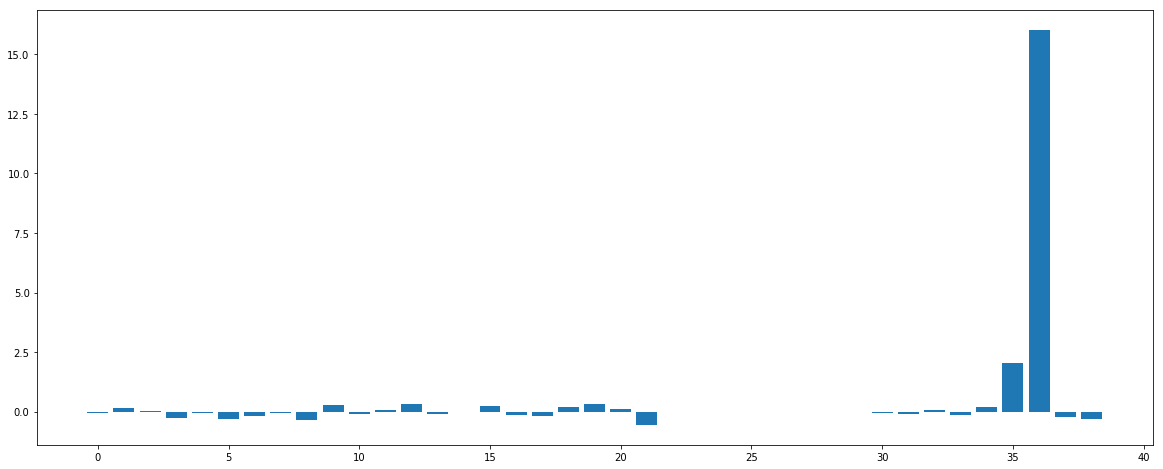

In [31]:
model = LinearRegression()
model.fit(x_train, y_train)
importance = model.coef_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
import matplotlib.pyplot as plt
plt.figure(figsize=[20,8])
plt.bar([x for x in range(len(importance))], importance)
plt.show()

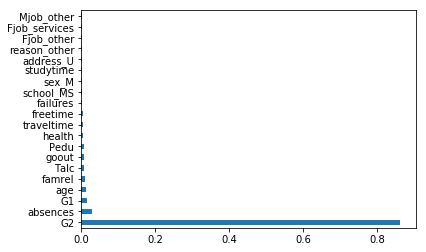

G2               0.862590
absences         0.030343
G1               0.016727
age              0.011868
famrel           0.011548
Talc             0.008800
goout            0.007566
Pedu             0.006967
health           0.005225
traveltime       0.004858
freetime         0.004366
failures         0.003164
school_MS        0.003161
sex_M            0.003090
studytime        0.002505
address_U        0.002161
reason_other     0.001539
Fjob_other       0.001526
Fjob_services    0.001507
Mjob_other       0.001433
dtype: float64


In [37]:
model = RandomForestRegressor(random_state=2)
model.fit(x_train,y_train)
feat_imp = pd.Series(model.feature_importances_, index=x_train.columns)

df_imp_feat = feat_imp.nlargest(20)

df_imp_feat.plot(kind='barh')
plt.show()
print(df_imp_feat)

In [42]:
# Using the above features to train a Random forest model:
imp_feat_rf = ['G2', 'absences', 'G1', 'age', 'famrel', 'Talc', 'goout', 'Pedu', 'health', 'traveltime', 'freetime', 'failures',
               'school_MS', 'sex_M', 'studytime', 'address_U', 'reason_other', 'Fjob_other', 'Fjob_services', 'Mjob_other']

model = RandomForestRegressor()
model.fit(x_train[imp_feat_rf], y_train)
print('Train MAE : ', mean_absolute_error(y_train, model.predict(x_train[imp_feat_rf])))
print('Test MAE : ', mean_absolute_error(y_test, model.predict(x_test[imp_feat_rf])), '\n')
print('Train RMSE : ', np.sqrt(mean_squared_error(y_train, model.predict(x_train[imp_feat_rf]))))
print('Test RMSE : ', np.sqrt(mean_squared_error(y_test, model.predict(x_test[imp_feat_rf]))), '\n')

Train MAE :  0.28876685934489404
Test MAE :  0.9738461538461539 

Train RMSE :  0.4441967919523194
Test RMSE :  1.62485407628832 



In [43]:
# Trying to fit these features in LR model:
model = LinearRegression()
model.fit(x_train[imp_feat_rf], y_train)
print('Train MAE : ', mean_absolute_error(y_train, model.predict(x_train[imp_feat_rf])))
print('Test MAE : ', mean_absolute_error(y_test, model.predict(x_test[imp_feat_rf])), '\n')
print('Train RMSE : ', np.sqrt(mean_squared_error(y_train, model.predict(x_train[imp_feat_rf]))))
print('Test RMSE : ', np.sqrt(mean_squared_error(y_test, model.predict(x_test[imp_feat_rf]))), '\n')

Train MAE :  0.7197528896303507
Test MAE :  0.9725278705994808 

Train RMSE :  1.0904762085867785
Test RMSE :  1.6781739587771818 



In [44]:
# Slightly improves the error scores for LR model.

In [45]:
# Finding important features using Pearson Correlation:

from sklearn.feature_selection import f_regression, SelectKBest

best_features = SelectKBest(score_func=f_regression, k=20)
fit = best_features.fit(x_train,y_train)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x_train.columns)

# concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  # name output columns
print(feature_scores.nlargest(25,'Score'))

         Feature_Name        Score
36                 G2  3504.315524
35                 G1  1171.836978
21           failures    96.555629
17          school_MS    39.003197
20          studytime    36.305373
37               Pedu    34.406625
15          address_U    21.509206
38               Talc    16.646390
19         traveltime    14.053642
12       Mjob_teacher    13.168703
4   reason_reputation    12.209919
34           absences     8.639619
8        Fjob_teacher     8.076042
16              sex_M     7.200730
9         Mjob_health     6.071324
1      guardian_other     5.528912
3        reason_other     5.130638
30             famrel     4.811404
18                age     4.540513
31           freetime     4.408267
2         reason_home     2.608933
10         Mjob_other     2.444485
5         Fjob_health     1.954448
33             health     1.703632
6          Fjob_other     0.884355


In [46]:
imp_feat_corr = np.array(feature_scores['Feature_Name'])
imp_feat_corr

array(['guardian_mother', 'guardian_other', 'reason_home', 'reason_other',
       'reason_reputation', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Pstatus_T', 'famsize_LE3', 'address_U', 'sex_M',
       'school_MS', 'age', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health',
       'absences', 'G1', 'G2', 'Pedu', 'Talc'], dtype=object)

In [47]:
model = LinearRegression()
model.fit(x_train[imp_feat_corr], y_train)
print('Train MAE : ', mean_absolute_error(y_train, model.predict(x_train[imp_feat_corr])))
print('Test MAE : ', mean_absolute_error(y_test, model.predict(x_test[imp_feat_corr])), '\n')
print('Train RMSE : ', np.sqrt(mean_squared_error(y_train, model.predict(x_train[imp_feat_corr]))))
print('Test RMSE : ', np.sqrt(mean_squared_error(y_test, model.predict(x_test[imp_feat_corr]))), '\n')

Train MAE :  0.7137839722480446
Test MAE :  0.9818952214031834 

Train RMSE :  1.0839549171984422
Test RMSE :  1.6800035859022797 



In [48]:
# Hypertuning Linear Regression model with features selected from Random forest model:

from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV

lambdas1=np.linspace(1,100,100)
params1={'alpha':lambdas1}

lambdas2=np.linspace(0.01,1,100)
params2={'alpha':lambdas2}

lambdas3=np.linspace(0.01,10,100)
params3={'alpha':lambdas3}

In [50]:
lambdas = [params1, params2, params3]

for i, lambda_i in range(1,4), lambdas:
    
    print('lambda : ', i)
    
    grid_search=GridSearchCV(Ridge(fit_intercept=True),
                             param_grid=lambda_i,
                             cv=10,
                             scoring='neg_mean_absolute_error')
    
    grid_search.fit(x_train, y_train)
    model_name = 'lr_model_' + str(i)
    model_name = grid_search.best_estimator_

    print('Train MAE : ', mean_absolute_error(y_train, model_name.predict(x_train)))
    print('Test MAE : ', mean_absolute_error(y_test, model_name.predict(x_test)), '\n')
    print('Train RMSE : ', np.sqrt(mean_squared_error(y_train, model_name.predict(x_train))))
    print('Test RMSE : ', np.sqrt(mean_squared_error(y_test, model_name.predict(x_test))), '\n')

ValueError: too many values to unpack (expected 2)

In [51]:
grid_search=GridSearchCV(Ridge(fit_intercept=True),
                         param_grid=params1,
                         cv=10,
                         scoring='neg_mean_absolute_error')

grid_search.fit(x_train, y_train)
lr_model1 = grid_search.best_estimator_

print('Train MAE : ', mean_absolute_error(y_train, lr_model1.predict(x_train)))
print('Test MAE : ', mean_absolute_error(y_test, lr_model1.predict(x_test)), '\n')
print('Train RMSE : ', np.sqrt(mean_squared_error(y_train, lr_model1.predict(x_train))))
print('Test RMSE : ', np.sqrt(mean_squared_error(y_test, lr_model1.predict(x_test))), '\n')

Train MAE :  0.7173256372850579
Test MAE :  0.9824304035095982 

Train RMSE :  1.1094881827748568
Test RMSE :  1.693337253564736 



In [52]:
grid_search=GridSearchCV(Ridge(fit_intercept=True),
                         param_grid=params2,
                         cv=10,
                         scoring='neg_mean_absolute_error')

grid_search.fit(x_train, y_train)
lr_model2 = grid_search.best_estimator_

print('Train MAE : ', mean_absolute_error(y_train, lr_model2.predict(x_train)))
print('Test MAE : ', mean_absolute_error(y_test, lr_model2.predict(x_test)), '\n')
print('Train RMSE : ', np.sqrt(mean_squared_error(y_train, lr_model2.predict(x_train))))
print('Test RMSE : ', np.sqrt(mean_squared_error(y_test, lr_model2.predict(x_test))), '\n')

Train MAE :  0.7099218245213916
Test MAE :  0.9811548990774095 

Train RMSE :  1.0893813908663685
Test RMSE :  1.6797719362569516 



In [53]:
grid_search=GridSearchCV(Ridge(fit_intercept=True),
                         param_grid=params3,
                         cv=10,
                         scoring='neg_mean_absolute_error')

grid_search.fit(x_train, y_train)
lr_model3 = grid_search.best_estimator_

print('Train MAE : ', mean_absolute_error(y_train, lr_model3.predict(x_train)))
print('Test MAE : ', mean_absolute_error(y_test, lr_model3.predict(x_test)), '\n')
print('Train RMSE : ', np.sqrt(mean_squared_error(y_train, lr_model3.predict(x_train))))
print('Test RMSE : ', np.sqrt(mean_squared_error(y_test, lr_model3.predict(x_test))), '\n')

Train MAE :  0.7100474051162013
Test MAE :  0.9811039660614325 

Train RMSE :  1.0904962150591366
Test RMSE :  1.6803222751744997 



In [54]:
grid_search=GridSearchCV(Ridge(fit_intercept=True),
                         param_grid=params1,
                         cv=10,
                         scoring='neg_mean_absolute_error')

grid_search.fit(x_train, y_train)
ll_model1 = grid_search.best_estimator_

print('Train MAE : ', mean_absolute_error(y_train, ll_model1.predict(x_train)))
print('Test MAE : ', mean_absolute_error(y_test, ll_model1.predict(x_test)), '\n')
print('Train RMSE : ', np.sqrt(mean_squared_error(y_train, ll_model1.predict(x_train))))
print('Test RMSE : ', np.sqrt(mean_squared_error(y_test, ll_model1.predict(x_test))), '\n')

Train MAE :  0.7173256372850579
Test MAE :  0.9824304035095982 

Train RMSE :  1.1094881827748568
Test RMSE :  1.693337253564736 



In [55]:
grid_search=GridSearchCV(Ridge(fit_intercept=True),
                         param_grid=params2,
                         cv=10,
                         scoring='neg_mean_absolute_error')

grid_search.fit(x_train, y_train)
ll_model2 = grid_search.best_estimator_

print('Train MAE : ', mean_absolute_error(y_train, ll_model2.predict(x_train)))
print('Test MAE : ', mean_absolute_error(y_test, ll_model2.predict(x_test)), '\n')
print('Train RMSE : ', np.sqrt(mean_squared_error(y_train, ll_model2.predict(x_train))))
print('Test RMSE : ', np.sqrt(mean_squared_error(y_test, ll_model2.predict(x_test))), '\n')

Train MAE :  0.7099218245213916
Test MAE :  0.9811548990774095 

Train RMSE :  1.0893813908663685
Test RMSE :  1.6797719362569516 



In [56]:
grid_search=GridSearchCV(Ridge(fit_intercept=True),
                         param_grid=params3,
                         cv=10,
                         scoring='neg_mean_absolute_error')

grid_search.fit(x_train, y_train)
ll_model3 = grid_search.best_estimator_

print('Train MAE : ', mean_absolute_error(y_train, ll_model3.predict(x_train)))
print('Test MAE : ', mean_absolute_error(y_test, ll_model3.predict(x_test)), '\n')
print('Train RMSE : ', np.sqrt(mean_squared_error(y_train, ll_model3.predict(x_train))))
print('Test RMSE : ', np.sqrt(mean_squared_error(y_test, ll_model3.predict(x_test))), '\n')

Train MAE :  0.7100474051162013
Test MAE :  0.9811039660614325 

Train RMSE :  1.0904962150591366
Test RMSE :  1.6803222751744997 



In [57]:
# Saving Lasso model obtained with grid search from params2 model
import pickle

# open a file, where you ant to store the data
file = open('Student_GradePred.pkl', 'wb')

# dump information to that file
pickle.dump(ll_model2, file)